<a href="https://colab.research.google.com/github/iamsoyeon/AI_platform/blob/revision/Plant_revisioncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git


Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 30.18 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.


In [2]:
%cd PlantVillage-Dataset

/content/PlantVillage-Dataset


In [3]:
%cd data_distribution_for_SVM

/content/PlantVillage-Dataset/data_distribution_for_SVM


In [4]:

import warnings
warnings.filterwarnings("ignore")
import os
import glob
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Add
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation, AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.optimizers import Adam


In [5]:
train_dir = "./train/"
test_dir = "./test/"

In [6]:
train_dir

'./train/'

In [7]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count = 0
  for current_path, dirs, files in os.walk(directory):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path, dr + "/*")))
  return count

In [8]:
train_samples = get_files(train_dir)
num_classes = len(glob.glob(train_dir + "/*"))
test_samples = get_files(test_dir)
print(num_classes, "Classes")
print(train_samples, "Train images")
print(test_samples, "Test images")

38 Classes
8751 Train images
10547 Test images


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)
batch_size = 32
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size)
test_generator = test_datagen.flow_from_directory(test_dir, shuffle=True,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size)

Found 8751 images belonging to 38 classes.
Found 10547 images belonging to 38 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [12]:

model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


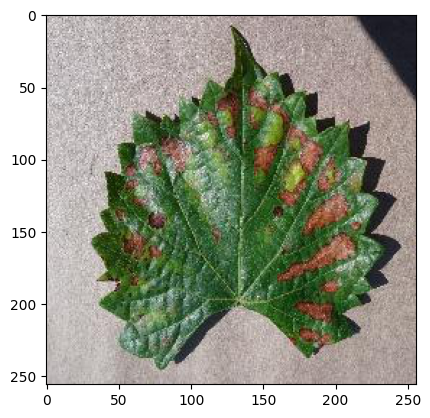

In [13]:
#from keras.preprocessing import image
import numpy as np

import keras.utils as image
img1 = image.load_img('./train/12/049c8615-7d94-4a4b-8467-fe20c0cecac1.JPG')
plt.imshow(img1);
img1 = image.load_img('./test/13/00d8329b-6621-4e08-8ec5-cf702eb3b205.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [14]:
from tensorflow.keras.models import Sequential, Model
# Extract features using intermediate layers
conv2d_11_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_11_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d').output)
conv2d_12_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_12_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_1').output)
conv2d_13_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)
max_pooling2d_13_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_2').output)
flatten_2_output = Model(inputs=model.input, outputs=model.get_layer('flatten').output)

conv2d_11_features = conv2d_11_output.predict(img)
max_pooling2d_11_features = max_pooling2d_11_output.predict(img)
conv2d_12_features = conv2d_12_output.predict(img)
max_pooling2d_12_features = max_pooling2d_12_output.predict(img)
conv2d_13_features = conv2d_13_output.predict(img)
max_pooling2d_13_features = max_pooling2d_13_output.predict(img)
flatten_2_features = flatten_2_output.predict(img)


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 21ms/step


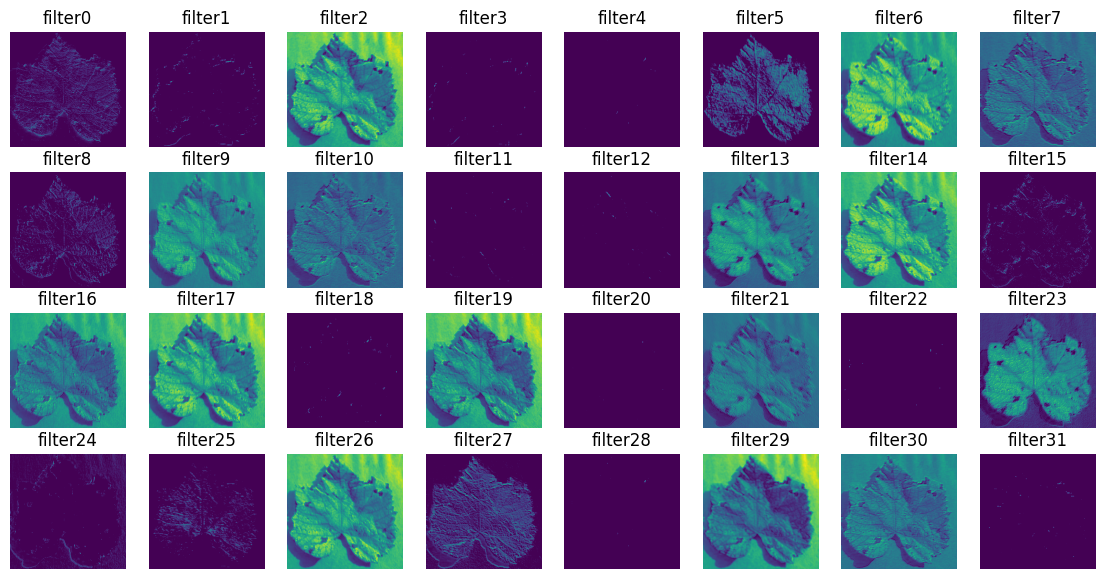

In [15]:
import matplotlib.pyplot as plt

# Get the output tensor from the conv2d_11_output model
conv2d_11_output_tensor = conv2d_11_output.predict(img)

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 4
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(conv2d_11_output_tensor[0, :, :, i], cmap='viridis')
plt.show()


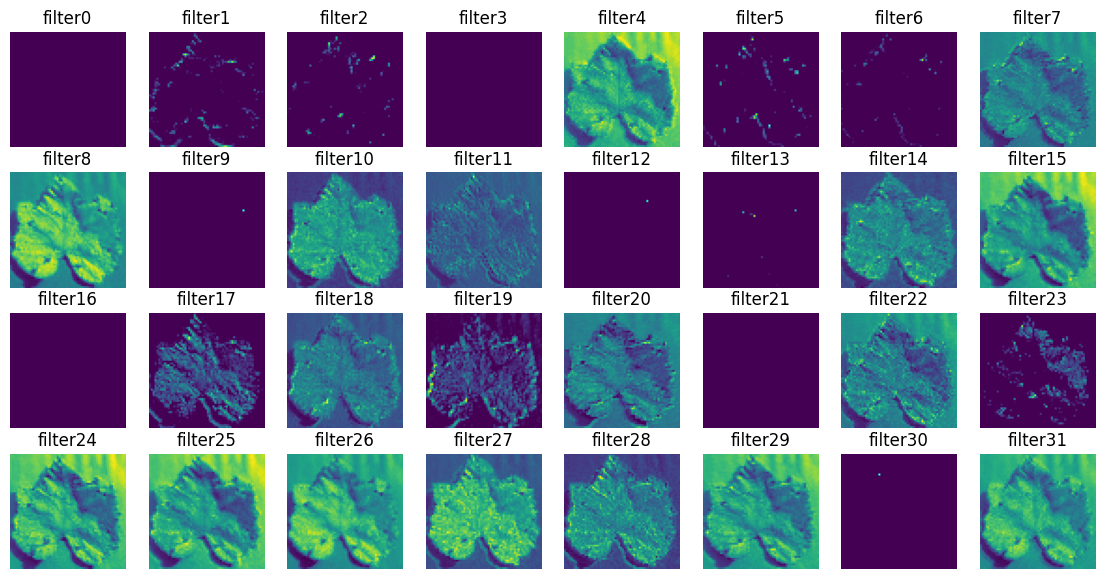

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 4
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(max_pooling2d_12_features[0, :, :, i], cmap='viridis')
plt.show()


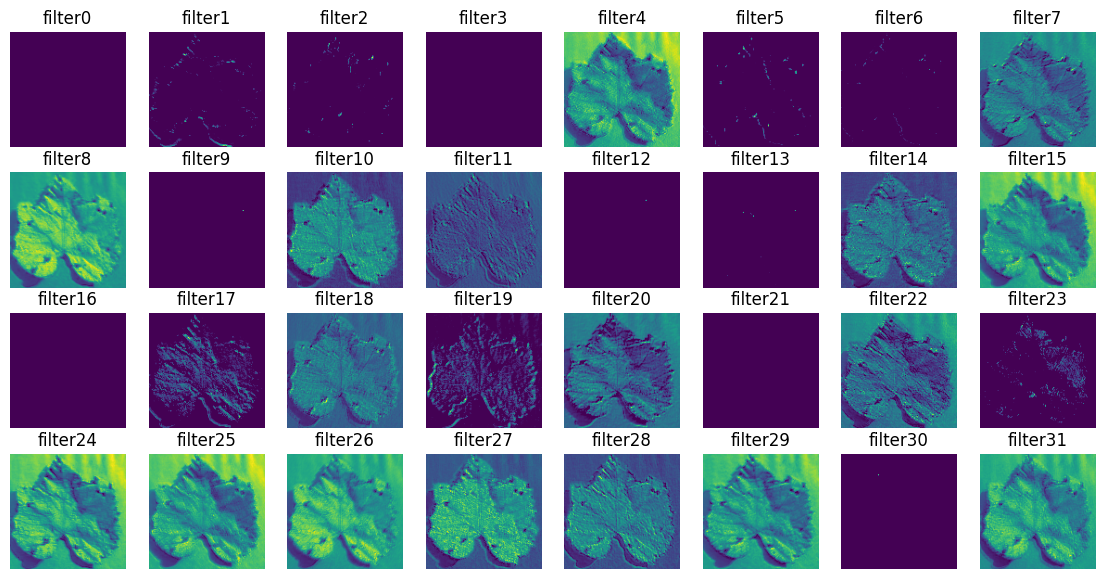

In [17]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_12_features[0, :, :, i], cmap='viridis')
plt.show()

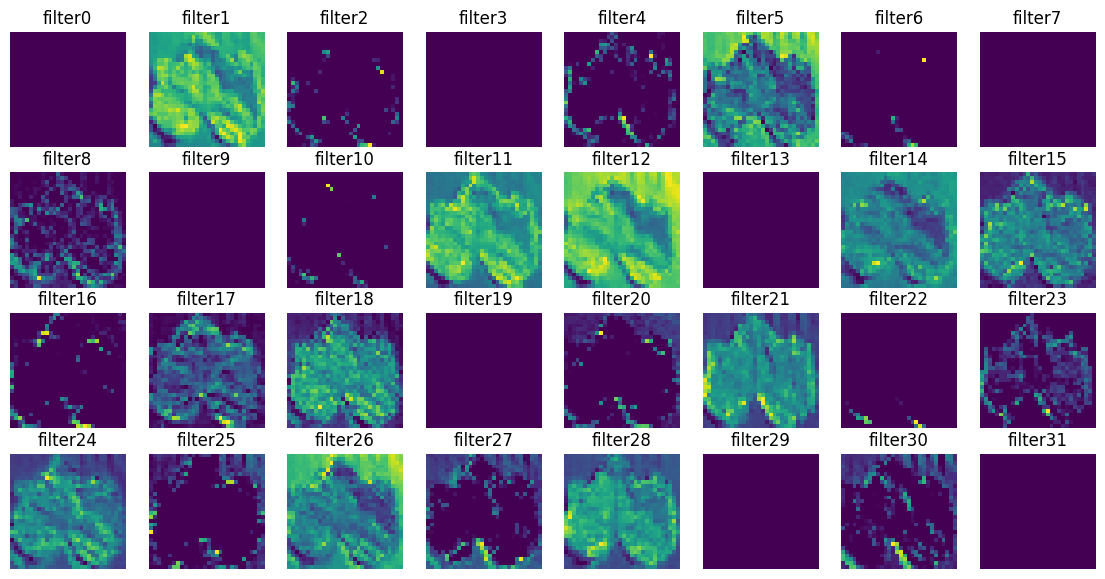

In [18]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_13_features[0, :, :, i], cmap='viridis')
plt.show()

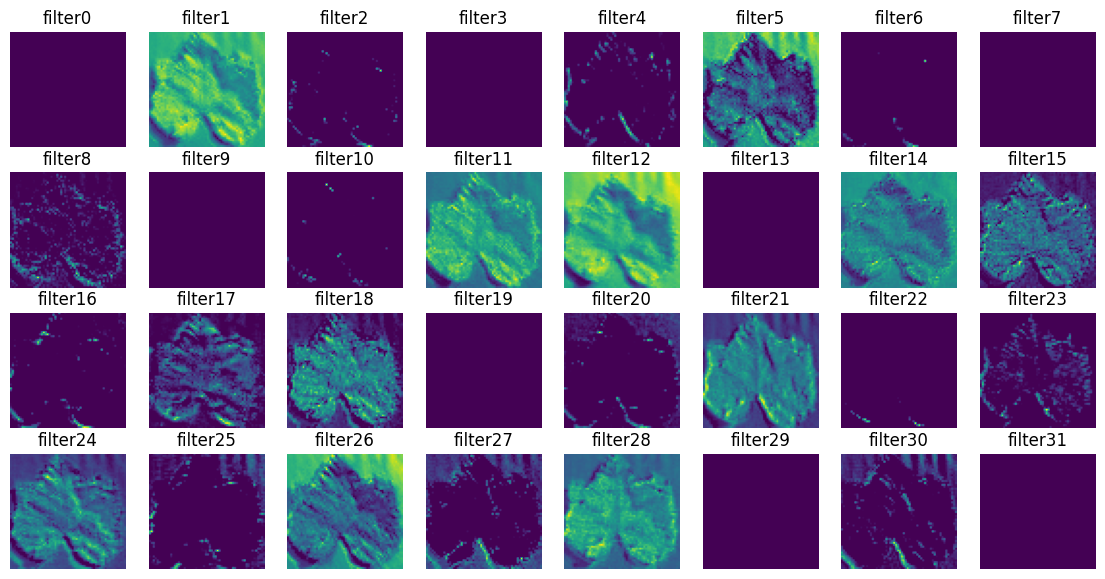

In [19]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_13_features[0, :, :, i], cmap='viridis')
plt.show()

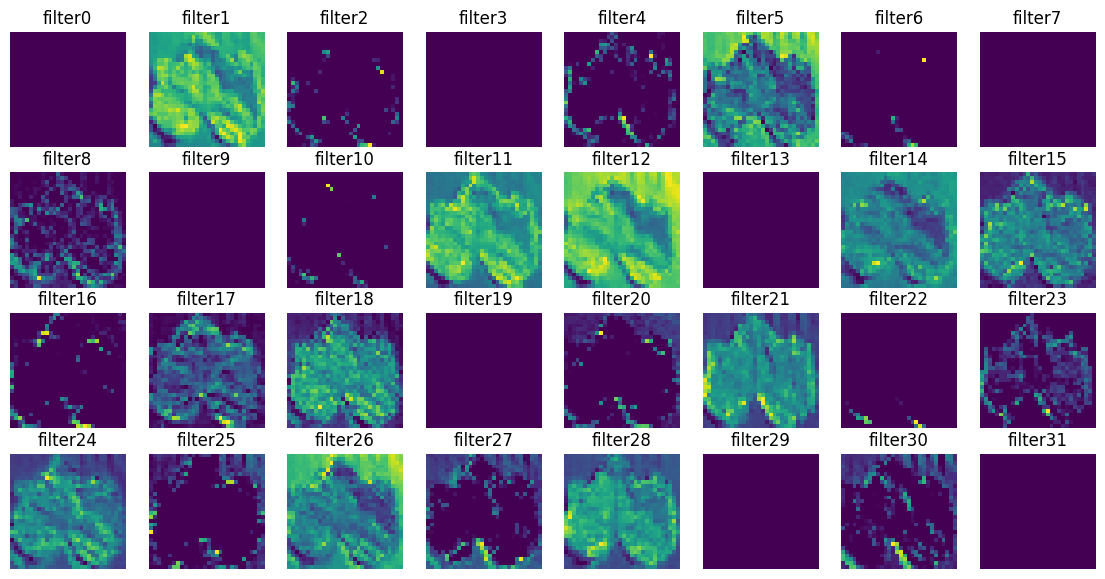

In [20]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_13_features[0, :, :, i], cmap='viridis')
plt.show()

In [21]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 8751 images belonging to 38 classes.


In [22]:
#opt=keras.optimizers.Adam(lr=0.001)
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=30,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          )#val_samples= validation_generator.samples// batch_size,verbose=1)

Epoch 1/30
273/273 [==============================] - 314s 1s/step - loss: 0.1056 - accuracy: 0.3049 - val_loss: 0.0644 - val_accuracy: 0.5202
Epoch 2/30
273/273 [==============================] - 301s 1s/step - loss: 0.0650 - accuracy: 0.5322 - val_loss: 0.0459 - val_accuracy: 0.6800
Epoch 3/30
273/273 [==============================] - 303s 1s/step - loss: 0.0536 - accuracy: 0.6185 - val_loss: 0.0388 - val_accuracy: 0.7262
Epoch 4/30
273/273 [==============================] - 355s 1s/step - loss: 0.0452 - accuracy: 0.6864 - val_loss: 0.0303 - val_accuracy: 0.7929
Epoch 5/30
273/273 [==============================] - 303s 1s/step - loss: 0.0413 - accuracy: 0.7106 - val_loss: 0.0289 - val_accuracy: 0.8100
Epoch 6/30
273/273 [==============================] - 304s 1s/step - loss: 0.0370 - accuracy: 0.7466 - val_loss: 0.0245 - val_accuracy: 0.8378
Epoch 7/30
273/273 [==============================] - 300s 1s/step - loss: 0.0346 - accuracy: 0.7637 - val_loss: 0.0227 - val_accuracy: 0.8577

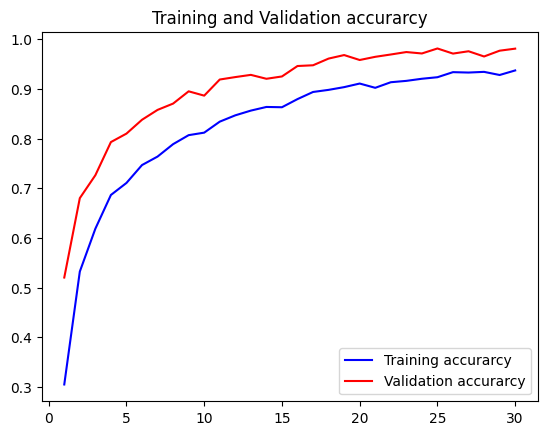

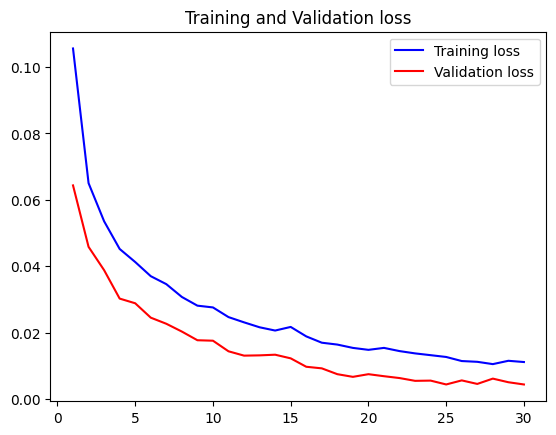

In [23]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()